Hello, we are Regression Rockstarz! This is our very first attempt at Datathon and we are very excited to embark on this transformative journey, where we can learn new useful skills. :D

1 Loading Data

Our group decided to use pandas, as encouraged by the Zoom workshop coordinators. We start off by reading the data and viewing the stucture of the data provided

In [44]:
import pandas as pd

# the size of our dataset will be ~32k
filepath = "./data/catA_train.csv"
df2 = pd.read_csv(r"C:\Users\Gwenyth\OneDrive - National University of Singapore\Documents\Y1S2\catA_train.csv")

# get information about our dataframe
print(df2.info())

# find the number of rows and columns in our dataset
print(df2.shape)

# find the names of columns in our dataset
print(df2.columns)

#show count, mean, std, and qunatile information for each numerical column
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29182 entries, 0 to 29181
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             29062 non-null  float64
 1   LONGITUDE                            29062 non-null  float64
 2   AccountID                            29182 non-null  object 
 3   Company                              29182 non-null  object 
 4   SIC Code                             29182 non-null  int64  
 5   Industry                             29182 non-null  object 
 6   8-Digit SIC Code                     29182 non-null  int64  
 7   8-Digit SIC Description              29182 non-null  object 
 8   Year Found                           28748 non-null  float64
 9   Entity Type                          29182 non-null  object 
 10  Parent Company                       28668 non-null  object 
 11  Parent Country              

,LATITUDE,LONGITUDE,SIC Code,8-Digit SIC Code,Year Found,Square Footage,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Is Domestic Ultimate,Is Global Ultimate
count,29062.000000,29062.000000,29182.000000,2.918200e+04,28748.000000,0.0,16779.000000,29103.000000,2.640800e+04,2.918200e+04,2.918200e+04,29182.000000,29182.000000
mean,1.320677,103.843324,6169.271160,6.169092e+07,2004.505913,NaN,36.856189,139.764182,6.994665e+03,7.520992e+08,3.931771e+09,0.500069,0.257248
std,0.043740,0.053757,1705.845535,1.705778e+07,13.464238,NaN,173.334420,1118.939249,4.539462e+04,1.019636e+10,2.184589e+10,0.500009,0.437125
min,1.238792,103.611319,132.000000,1.320000e+06,1819.000000,NaN,1.000000,1.000000,1.000000e+00,-1.502631e+08,1.000000e+00,0.000000,0.000000
25%,1.284665,103.831874,5084.000000,5.084000e+07,1997.000000,NaN,10.000000,4.000000,4.000000e+00,1.026308e+06,1.026308e+06,0.000000,0.000000
50%,1.309701,103.848989,6719.000000,6.719000e+07,2008.000000,NaN,16.000000,16.000000,1.500000e+01,2.606644e+06,3.259582e+06,1.000000,0.000000
75%,1.337889,103.865922,7311.000000,7.311000e+07,2014.000000,NaN,29.000000,60.000000,1.000000e+02,2.176969e+07,1.482258e+08,1.000000,1.000000
max,1.469800,104.003218,9721.000000,9.721990e+07,2023.000000,NaN,12000.000000,80000.000000,2.190000e+06,3.184760e+11,5.140000e+11,1.000000,1.000000


2. Feature Selection and Data Cleaning

Since we have many columns, it is important that we choose the correct features with respect to the target (sales). 

Dimensionality reduction is the process of reducing the number of features or columns in a dataset.

This helps to improve computational efficiency, overfitting prevention, and handling multicollinarity.

To do so, we decided to use a correlation matrix, where we observe the correlation values to choose our most significant columnsas correlation matrix helps show how a variable in a dataset is affected by other variables.

The correlation value bewteen Sales (Global Ultimate Total USD) and Employees (Global Ultimate Total)	is  0.664014, signalling a relatively strong positive correlation. Thus, we think that it is important to include both the Global and domestic sales columns.

Other than these two columns, we also decided to include:
- Company
- 8-Digit SIC Code. This information alllows the model to capture industry specific relation and sales.
- Sales (Domestic Ultimate USD). Domestic sales helps the model understand the impact of domestic operations on overall sales.
- Is Global Ultimate. This indicates a company's position in the corporate hierarchy.

We proceed to clean our data by removing NA values which will help to increase our data consistency and data accuracy, and it is also staightforward and simple to use. This prevents bias in our data analysis and ensures that our predictions are robust.
We decided not to impute values in our missing data as it may impact the result of the statistical analysis on the data set if the wrong imputation technique is used

In [45]:
# Selecting the datatypes that we are interested in
numerical_df = df2.select_dtypes(include=['float64', 'int64'])

# Creating our correlation matrix
correlation_matrix = numerical_df.corr()
correlation_df = pd.DataFrame(correlation_matrix)
print(correlation_df)

# Based on our results, these are the columns that we chose.
selected_columns = df2[['Company','8-Digit SIC Code', 'Employees (Global Ultimate Total)', 'Sales (Domestic Ultimate Total USD)', 'Sales (Global Ultimate Total USD)', 'Is Global Ultimate']]

# Removing rows with NA values in our chosen columns
df3 = selected_columns.dropna(subset=['Company','8-Digit SIC Code', 'Employees (Global Ultimate Total)', 'Sales (Domestic Ultimate Total USD)', 'Sales (Global Ultimate Total USD)', 'Is Global Ultimate'])

# Check that all NA values are removed
print(df3.isna().sum())

                                     LATITUDE  LONGITUDE  SIC Code  \
LATITUDE                             1.000000  -0.048014 -0.086447   
LONGITUDE                           -0.048014   1.000000  0.027467   
SIC Code                            -0.086447   0.027467  1.000000   
8-Digit SIC Code                    -0.086741   0.027591  0.999772   
Year Found                          -0.023920  -0.008341  0.195683   
Square Footage                            NaN        NaN       NaN   
Employees (Single Site)              0.001218  -0.006147 -0.050296   
Employees (Domestic Ultimate Total)  0.004256   0.013906 -0.022058   
Employees (Global Ultimate Total)   -0.010028   0.003871  0.001587   
Sales (Domestic Ultimate Total USD)  0.004602  -0.006884 -0.011493   
Sales (Global Ultimate Total USD)   -0.010685   0.008687 -0.014743   
Is Domestic Ultimate                -0.004247   0.001314  0.016096   
Is Global Ultimate                  -0.039308   0.009406  0.087371   

                   

3 Graphical Visualisation

We now analyse and investigate our dataset of form some conclusions from the data.

From the Scatterplot between Employees (Global Ultimate Total) and Sales (Global Ultimate Total USD), there is a positive linear correlation between the 2 variables, supported by the relatively strong correlation value of 0.664014 we found earlier. This suggest that Employees (Global Ultimate Total) may be the most important feature in predicting the sales of a company.

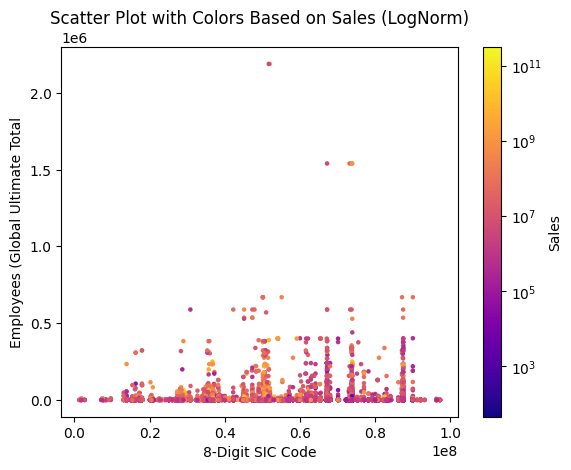

<Axes: xlabel='Employees (Global Ultimate Total)', ylabel='Sales (Global Ultimate Total USD)'>

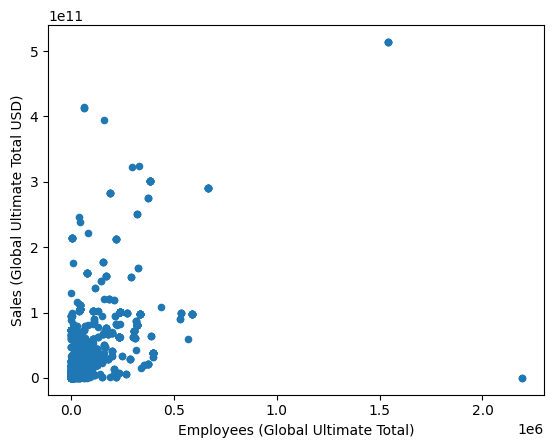

In [46]:
# import required libraries
import matplotlib.pyplot as plt

# we will need this for the color gradient representing how high the domestic sales figure is.
from matplotlib.colors import LogNorm
import seaborn as sns

# Use LogNorm for more sensitivity to numerical changes
norm = LogNorm()

# Define a colormap transitioning from blue to red
cmap = 'plasma'

# Scatter plot with colors based on Sales values and LogNorm
scatter = plt.scatter(df3['8-Digit SIC Code'], df3['Employees (Global Ultimate Total)'], c=df3['Sales (Domestic Ultimate Total USD)'], cmap=cmap, s=5, norm=norm)

# Add a colorbar
cbar = plt.colorbar(scatter, label='Sales')

# Set labels and title
plt.xlabel('8-Digit SIC Code')
plt.ylabel('Employees (Global Ultimate Total')
plt.title('Scatter Plot with Colors Based on Sales (LogNorm)')

# Show the plot
plt.show()

#plotting scatter plot between Employees (Global Ultimate Total) and Sales (Global Ultimate Total USD)
df3.plot(kind='scatter', x = 'Employees (Global Ultimate Total)', y='Sales (Global Ultimate Total USD)')

3 Selecting a suitable model to Predict Future Sales

Finally, we chose to use a linear regression model to predict future sales. We chose to use a linear regression model because it does not assume that variables are normally distributed, making it more robust. Furthermore, a linear regression model is effective for both interpolation and extrapolation. Additionally, linear regression models generally have lower variance compared to more complex models.

Since our model can only interpret numeric values, we need to convert our categorical data (Company) to Numeric(binary) form. We used map() because one-hot encoding using pd.get_dummies() creates more columns, resulting in the dataset having too many features, and changing the dimensionality of the data.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

features = ['8-Digit SIC Code', 'Employees (Global Ultimate Total)', 'Sales (Domestic Ultimate Total USD)', 'Sales (Global Ultimate Total USD)', 'Is Global Ultimate']

# Drop rows with missing values to clean our dataset
df3 = df3.dropna(subset=features)

# Convert 'Is Global Ultimate' to binary values as our model does not work well with strings
df3['Is Global Ultimate'] = df3['Is Global Ultimate'].map({'Yes': 1, 'No': 0})

X = df3[features]
y = df3['Sales (Global Ultimate Total USD)']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# IMPUTE
imputer = SimpleImputer(strategy='mean') 
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Making our predictions
y_pred = model.predict(X_test_imputed)

# Adding a column containing our predicted sales
df3['Predicted Sales'] = model.predict(imputer.transform(X))

print(df3)


                                            Company  8-Digit SIC Code  \
1              NEW DESERT ORCHID SHIPPING PTE. LTD.          44490000   
2                       2MBAO BIOCELLBANK PTE. LTD.          67190000   
3                                NEWBLOOM PTE. LTD.          67190000   
4                      ASIA GREEN CAPITAL PTE. LTD.          67190000   
5                         SEMCO SALVAGE (V) PTE LTD          49590000   
...                                             ...               ...   
29176                       RYB ENGINEERING PTE LTD          17310000   
29177  DYSTAR GLOBAL HOLDINGS (SINGAPORE) PTE. LTD.          67199901   
29178                           ORTUS HOLDINGS LTD.          67190000   
29180                   FANSIPAN HOLDINGS PTE. LTD.          67190000   
29181               WHOLESOME FOOD PEOPLE PTE. LTD.          50990000   

       Employees (Global Ultimate Total)  Sales (Domestic Ultimate Total USD)  \
1                                  100.0  

c:\Users\Gwenyth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_base.py:565: UserWarning: Skipping features without any observed values: ['Is Global Ultimate']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\Gwenyth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_base.py:565: UserWarning: Skipping features without any observed values: ['Is Global Ultimate']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\Gwenyth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_base.py:565: UserWarning: Skipping features without any observed values: ['Is Global Ultimate']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Cross-Validation

We will also perform a K-fold Cross Validation. This helps us mitigate the risk of overfitting on a specific set of data, by being able to split the data into K number of folds, test on 1 fold and train for the rest for K number of times.

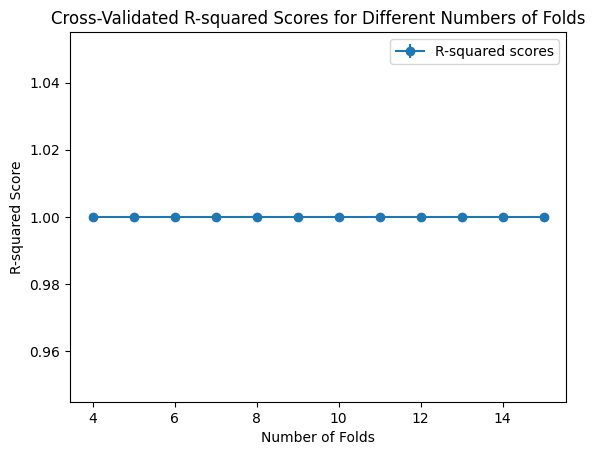

In [48]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# Lists to store results
n_folds_values = list(range(4, 16))
mean_r2_scores = []
std_r2_scores = []

# Iterate over different numbers of folds
for n_folds in n_folds_values:
    # Use k-fold cross-validation with the current number of folds
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Perform cross-validation and get R-squared scores
    cv_scores = cross_val_score(model, X_train_imputed, y_train, cv=kf, scoring='r2')

    # Append mean and standard deviation of R-squared scores to lists
    mean_r2_scores.append(cv_scores.mean())
    std_r2_scores.append(cv_scores.std())

# Plot the results
plt.errorbar(n_folds_values, mean_r2_scores, yerr=std_r2_scores, marker='o', linestyle='-', label='R-squared scores')
plt.xlabel('Number of Folds')
plt.ylabel('R-squared Score')
plt.title('Cross-Validated R-squared Scores for Different Numbers of Folds')
plt.legend()
plt.show()

4 Checking the Performance of our Model (Model Evaluation)

To check the performance of our model, we have decided to use Mean Squared Error and Adjusted R-squared. 

Our mean squared error is 2.623763505082219e-08 which is very close to 0, suggesting that our model makes very accurate predictions on average.

Our Adjusted R-squared value is impressively, 1.0. This value suggests that the independent variables in the model explain a large proportion of variability in the dependent variable. Admittedly, this rarely occurs in real life, suggesting that we might have encountered problems while analysing the dataset.

In [51]:
# Calculating means squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Perform cross-validation and get R-squared scores
cv_scores = cross_val_score(model, X_train_imputed, y_train, cv=kf, scoring='r2')

# Print the mean and standard deviation of the R-squared scores
print("Mean R-squared score:", cv_scores.mean())
print("Standard Deviation of R-squared scores:", cv_scores.std())


# Calculate adjusted R-squared
n = len(y_test)  # sample size
p = X.shape[1]    # number of predictors (features)
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)

Mean Squared Error: 2.623763505082219e-08
Mean R-squared score: 1.0
Standard Deviation of R-squared scores: 0.0
R-squared: 1.0
Adjusted R-squared: 1.0


Saving and testing the model

We will export our model into a Hierarchical Data Format 5 File (.h5) for use by others. A general use case will also be covered in the form of a function below.